In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from utils import Bandit

In [2]:
class BernoulliThompsonSampling:
    def __init__(self, n_arms=2):
        self.n_arms = n_arms
        self.reward_history = [[] for _ in range(n_arms)]
        self.temp_beliefs = [(1, 1) for _ in range(n_arms)]
        
    def decide(self):
        for arm_id in range(self.n_arms):
            if len(self.reward_history[arm_id]) == 0:
                return arm_id
        
        draws = [
            np.random.beta(alpha, beta, size=1)
            for alpha, beta in self.temp_beliefs
        ]
        
        return int(np.random.choice(
            np.argwhere(draws == np.max(draws)).flatten()
        ))
    
    def update(self, arm_id, reward):
        self.reward_history[arm_id].append(reward)
        
        # Update parameters according to Bayes rule
        alpha, beta = self.temp_beliefs[arm_id]
        alpha += reward
        beta += 1 - reward
        self.temp_beliefs[arm_id] = alpha, beta

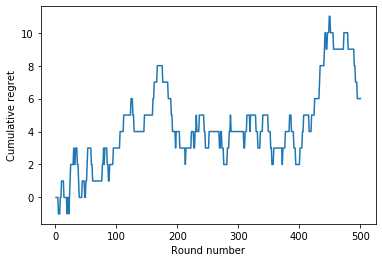

In [3]:
N_ARMS = 3

bandit = Bandit(
    optimal_arm_id=0,
    n_arms=3,
    reward_dists=[np.random.binomial for _ in range(N_ARMS)],
    reward_dists_params=[(1, 0.9), (1, 0.8), (1, 0.7)]
)

ths_policy = BernoulliThompsonSampling(n_arms=N_ARMS)

history, rewards, optimal_rewards = bandit.automate(
    ths_policy, n_rounds=500, visualize_regret=True
)

In [4]:
print(*history)

0 1 2 0 0 2 0 0 0 1 0 2 2 0 0 0 2 0 2 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 2 1 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [5]:
np.sum(np.array(history) == bandit.optimal_arm_id)

442

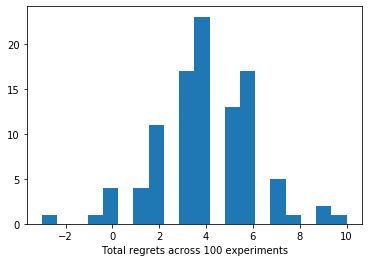

In [6]:
regrets = bandit.repeat(
    BernoulliThompsonSampling, [N_ARMS], n_experiments=100, n_rounds=300, visualize_regret_dist=True
)

In [7]:
np.mean(regrets), np.max(regrets)

(4.03, 10)